In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing CSV file into Pandas DataFrame
fraud_data = pd.read_csv('Financial_Data.csv')
print(fraud_data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
fraud_data.groupby(['type']).count()['isFlaggedFraud'].sort_values(ascending=True)

type
DEBIT         41432
TRANSFER     532909
CASH_IN     1399284
PAYMENT     2151495
CASH_OUT    2237500
Name: isFlaggedFraud, dtype: int64

In [4]:
#Dropping duplicates and missing values in DataFrame
#Finding if there are missing values from each column
print(fraud_data.isna().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [40]:
# No Missing record
fraud_data = fraud_data.dropna()

In [21]:
# Dropping Missing Rows
drop_rows = fraud_data.dropna()
print(drop_rows.shape)

(6362620, 11)


In [18]:
# If needed to drop columns that include columns with missing data
drop_columns = fraud_data.dropna(axis=1)
print(drop_columns.shape)

(6362620, 11)


In [46]:
# To view if there are duplicates
drop_duplicates = fraud_data.drop_duplicates(subset=['type'])
print(drop_duplicates.shape[0])

5


In [26]:
# Merging DataFrames. To find Unique payment type in the data

unique_payment_type = fraud_data["type"].unique()
print(unique_payment_type)
print(fraud_data.nunique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64


In [47]:
#Created a new file in order to add a risk rating to each payment type
fraudrisk_data = pd.read_csv('fraudrisk_data.csv')

fraudrisk_data['Type'] = fraudrisk_data['Type']

# Drop duplicates
print(fraudrisk_data.isna().sum())
drop_duplicates_of_fraud = fraudrisk_data.drop_duplicates(subset=['Type'])
print(drop_duplicates.shape[0])

Type                 0
Fraud Risk Rating    0
dtype: int64
5


In [39]:
# There are no duplicates in our data sets, so we can proceed to merge
merged_financialdata_and_fraudrisk = fraud_data.merge(fraudrisk_data,left_on='type',right_on='Type',how="outer")
print(merged_financialdata_and_fraudrisk.head())
merged_financialdata_and_fraudrisk.to_csv('merged_financialdata_and_fraudrisk.csv')
pd.read_csv('merged_financialdata_and_fraudrisk.csv', index_col=0)

   step     type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1  PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  PAYMENT  11668.14  C2048537720        41554.0        29885.86   
3     1  PAYMENT   7817.71    C90045638        53860.0        46042.29   
4     1  PAYMENT   7107.77   C154988899       183195.0       176087.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0        0               0   
1  M2044282225             0.0             0.0        0               0   
2  M1230701703             0.0             0.0        0               0   
3   M573487274             0.0             0.0        0               0   
4   M408069119             0.0             0.0        0               0   

      Type Fraud Risk Rating  
0  PAYMENT          Moderate  
1  PAYMENT          Moderate  
2  PAYMENT 

/Users/bintuawowole/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type,Fraud Risk Rating
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0,PAYMENT,Moderate
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0,PAYMENT,Moderate
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0,PAYMENT,Moderate
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0,PAYMENT,Moderate
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0,PAYMENT,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,718,CASH_IN,188888.89,C1459052107,51838.0,240726.89,C1955750585,0.00,0.00,0,0,CASH_IN,Minor
6362616,718,CASH_IN,27919.60,C562982749,2413.0,30332.60,C240654881,512791.59,484871.98,0,0,CASH_IN,Minor
6362617,718,CASH_IN,78988.38,C886862695,204464.0,283452.38,C262804200,108724.19,29735.81,0,0,CASH_IN,Minor
6362618,718,CASH_IN,18000.26,C50108853,63409.0,81409.26,C204102272,28088.61,10088.34,0,0,CASH_IN,Minor


In [104]:
groupby_data = fraud_data.groupby(['type']).count()['isFlaggedFraud'].sort_values(ascending=True)
print(groupby_data.head())
groupby_data.to_csv('groupby_data.csv')
pd.read_csv('groupby_data.csv', index_col=0)

type
DEBIT         41432
TRANSFER     532909
CASH_IN     1399284
PAYMENT     2151495
CASH_OUT    2237500
Name: isFlaggedFraud, dtype: int64


,isFlaggedFraud
type,
DEBIT,41432
TRANSFER,532909
CASH_IN,1399284
PAYMENT,2151495
CASH_OUT,2237500


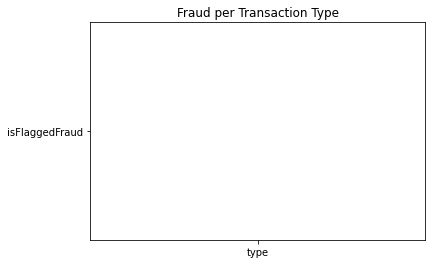

In [125]:
#Visualisation
#Bar Chart 
groupby_data = pd.read_csv('groupby_data.csv', index_col=0)
xx = 'type'
yy = 'isFlaggedFraud'
plt.bar(xx, yy, color = 'purple')
plt.title ('Fraud per Transaction Type')
plt.show()

In [130]:
groupby_data = pd.read_csv('groupby_data.csv', index_col=0)
xx = 'type'
yy = 'isFlaggedFraud'
sns.barplot(xx, yy)
plt.show()

ValueError: Could not interpret input 'type'